# 최 하단부 plt에 한국어 표시하기 위한 부분

In [18]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# df_mecab_adj의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 시작

In [4]:
# 데이터 불러오기

df_mecab_adj = pd.read_csv('/content/drive/MyDrive/Data/Preprocessing/mecab_adj_total.csv', encoding='utf-8')

df_mecab_adj.head()


,keyword,mecab_adj2
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [5]:
# mecab_adj2 컬럼을 mecab_adj로 변경하고 덮어쓰기

df_mecab_adj = df_mecab_adj.rename(columns={'mecab_adj2':'mecab_adj'})
df_mecab_adj.head()



,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [6]:
df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

df_mecab_adj.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [7]:
# mecab_adj에서 각 단어가 몇 번 나오는지 세기

from collections import Counter

count = Counter(df_mecab_adj['mecab_adj'].str.split(expand=True).stack())

count.most_common()

[('좋다', 401855),
 ('있다', 259370),
 ('같다', 250260),
 ('없다', 219411),
 ('많다', 195274),
 ('맛있다', 128110),
 ('작다', 33444),
 ('예쁘다', 31704),
 ('넓다', 28998),
 ('크다', 27462),
 ('높다', 25286),
 ('괜찮다', 25141),
 ('힘들다', 23610),
 ('재밌다', 20421),
 ('길다', 19236),
 ('아쉽다', 17562),
 ('늦다', 17366),
 ('편하다', 15656),
 ('이쁘다', 15283),
 ('그렇다', 14933),
 ('맑다', 14893),
 ('짧다', 14398),
 ('다', 12818),
 ('쉽다', 12477),
 ('르다', 12097),
 ('귀엽다', 11132),
 ('싫다', 10689),
 ('빠르다', 9732),
 ('적다', 9146),
 ('재미있다', 8903),
 ('멀다', 8744),
 ('멋있다', 8209),
 ('덥다', 7993),
 ('멋지다', 7794),
 ('좁다', 7607),
 ('아름답다', 7602),
 ('깊다', 7366),
 ('알차다', 7070),
 ('가볍다', 6879),
 ('어렵다', 6740),
 ('비싸다', 6597),
 ('즐겁다', 6020),
 ('무섭다', 5906),
 ('밝다', 5743),
 ('가깝다', 5728),
 ('낮다', 4974),
 ('야무지다', 4946),
 ('젊다', 4646),
 ('급하다', 4606),
 ('나쁘다', 4555),
 ('엄청나다', 4332),
 ('귀찮다', 4308),
 ('춥다', 4094),
 ('똑같다', 4079),
 ('새롭다', 4060),
 ('부드럽다', 3920),
 ('맛나다', 3768),
 ('수많다', 3742),
 ('붉다', 3561),
 ('아프다', 3125),
 ('바쁘다', 3033),
 ('싸다', 2904),

In [8]:
# mecab_adj_list의 단어 빈도수를 세고 1000번 이상 나오는 단어들을 삭제

from collections import Counter

mecab_adj_list = df_mecab_adj['mecab_adj'].tolist()

mecab_adj_list = [word for line in mecab_adj_list for word in line.split()]

count = Counter(mecab_adj_list)

# mecab_adj_list에서 1000번 이상 나오는 글자를 삭제

mecab_adj_list = [word for word in mecab_adj_list if count[word] < 1000]

mecab_adj_list

['습하다',
 '재미없다',
 '뿌옇다',
 '식다',
 '궂다',
 '인상깊다',
 '우연찮다',
 '무덥다',
 '조그맣다',
 '갑작스럽다',
 '겉다',
 '무겁다',
 '손쉽다',
 '걸맞다',
 '손쉽다',
 '까다롭다',
 '흔하다',
 '고되다',
 '어마다',
 '빡세다',
 '착하다',
 '굵다',
 '노랗다',
 '귀하다',
 '정겹다',
 '곱다',
 '빨갛다',
 '헛되다',
 '동그렇다',
 '부끄럽다',
 '인상깊다',
 '굵다',
 '노랗다',
 '귀하다',
 '궂다',
 '인상깊다',
 '우연찮다',
 '심심찮다',
 '흔하다',
 '덩그러다',
 '굵다',
 '빡세다',
 '배고프다',
 '환하다',
 '깜다',
 '어지럽다',
 '덧없다',
 '배고프다',
 '정겹다',
 '죠다',
 '남다르다',
 '낯설다',
 '정신없다',
 '흥겹다',
 '눈부시다',
 '활기차다',
 '두껍다',
 '비좁다',
 '유례없다',
 '슬프다',
 '힘차다',
 '아쉬우다',
 '습하다',
 '습하다',
 '우습다',
 '언짢다',
 '궂다',
 '인상깊다',
 '우연찮다',
 '심심찮다',
 '싶다',
 '매끄럽다',
 '흔하다',
 '덩그러다',
 '덧없다',
 '무덥다',
 '달갑다',
 '덩그러다',
 '흔하다',
 '습하다',
 '심심찮다',
 '갑작스럽다',
 '사이좋다',
 '활기차다',
 '습하다',
 '습하다',
 '우습다',
 '언짢다',
 '죠다',
 '빡세다',
 '속상하다',
 '어설프다',
 '잘다',
 '배고프다',
 '색다르다',
 '찐하다',
 '그만이다',
 '어려우다',
 '슬프다',
 '뜻깊다',
 '맑디맑다',
 '비좁다',
 '하얗다',
 '갑작스럽다',
 '아쉬우다',
 '무겁다',
 '아쉬우다',
 '실하다',
 '가벼우다',
 '습하다',
 '실하다',
 '스럽다',
 '착하다',
 '슴슴하다',
 '두껍다',
 '드물다',
 '벅차다',
 '뜨다',
 '단촐하다',
 '두텁다',
 '옳다',


In [9]:
# count에서 1000번 이상 나온 단어를 mecab_adj에서 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: ' '.join([word for word in x.split() if count[word] < 1000]))

df_mecab_adj.head()

print(df_mecab_adj.shape)
print(df_mecab_adj.size)

,keyword,mecab_adj
0,168계단,습하다 재미없다 뿌옇다 식다 궂다 인상깊다 우연찮다 무덥다 조그맣다 갑작스럽다 겉다...
1,25의용단,굵다 노랗다 귀하다 정겹다 곱다 빨갛다 헛되다 동그렇다 부끄럽다 인상깊다 굵다 노랗...
2,40계단 문화관,궂다 인상깊다 우연찮다 심심찮다 흔하다 덩그러다 굵다 빡세다 배고프다 환하다 깜다 ...
3,40계단 문화관광테마거리,궂다 인상깊다 우연찮다 심심찮다 싶다 매끄럽다 흔하다 덩그러다 덧없다 무덥다 달갑다...
4,60년전통 할매국밥,아쉬우다 무겁다 아쉬우다 실하다 가벼우다 습하다 실하다 스럽다 착하다 슴슴하다 두껍...


In [10]:
# mecab_adj에서 1글자인 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,습하다 재미없다 뿌옇다 식다 궂다 인상깊다 우연찮다 무덥다 조그맣다 갑작스럽다 겉다...
1,25의용단,굵다 노랗다 귀하다 정겹다 곱다 빨갛다 헛되다 동그렇다 부끄럽다 인상깊다 굵다 노랗...
2,40계단 문화관,궂다 인상깊다 우연찮다 심심찮다 흔하다 덩그러다 굵다 빡세다 배고프다 환하다 깜다 ...
3,40계단 문화관광테마거리,궂다 인상깊다 우연찮다 심심찮다 싶다 매끄럽다 흔하다 덩그러다 덧없다 무덥다 달갑다...
4,60년전통 할매국밥,아쉬우다 무겁다 아쉬우다 실하다 가벼우다 습하다 실하다 스럽다 착하다 슴슴하다 두껍...


In [ ]:
# mecab_adj 에서 mecab_adj_list를 이용해서 100회 이상 나오는 단어 삭제

# df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: ' '.join([word for word in x.split() if word not in mecab_adj_list]))

# df_mecab_adj.head()

,Unnamed: 0,keyword,mecab_adj,cluster
0,0,168계단,,17
1,1,25의용단,,52
2,2,40계단 문화관,,29
3,3,40계단 문화관광테마거리,,29
4,4,60년전통 할매국밥,,17


In [11]:
# mecab_adj 컬럼에서 집합을 이용해 중복되는 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: set(x.split()))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,"{갑작스럽다, 무덥다, 겉다, 무겁다, 걸맞다, 습하다, 조그맣다, 인상깊다, 착하..."
1,25의용단,"{부끄럽다, 귀하다, 곱다, 노랗다, 헛되다, 굵다, 정겹다, 인상깊다, 동그렇다,..."
2,40계단 문화관,"{흥겹다, 덩그러다, 남다르다, 슬프다, 습하다, 정신없다, 인상깊다, 힘차다, 배..."
3,40계단 문화관광테마거리,"{뜻깊다, 갑작스럽다, 하얗다, 싶다, 매끄럽다, 사이좋다, 덩그러다, 무덥다, 달..."
4,60년전통 할매국밥,"{뜨다, 스럽다, 무겁다, 습하다, 옳다, 벅차다, 두텁다, 싱겁다, 착하다, 척하..."


In [12]:
# { 를 [ 로 }를 ]로 바꾸기

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,"['갑작스럽다', '무덥다', '겉다', '무겁다', '걸맞다', '습하다', '조..."
1,25의용단,"['부끄럽다', '귀하다', '곱다', '노랗다', '헛되다', '굵다', '정겹다..."
2,40계단 문화관,"['흥겹다', '덩그러다', '남다르다', '슬프다', '습하다', '정신없다', ..."
3,40계단 문화관광테마거리,"['뜻깊다', '갑작스럽다', '하얗다', '싶다', '매끄럽다', '사이좋다', ..."
4,60년전통 할매국밥,"['뜨다', '스럽다', '무겁다', '습하다', '옳다', '벅차다', '두텁다'..."


In [ ]:
# # ,,을 ,로 바꾸고 [ 와 ]를 제거

# # df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace(',,', ',')
# df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace("'[''", '')
# df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace("'']'", '')

# # df_mecab_adj.head()

In [ ]:
# df_mecab_adj['mecab_adj'].isnull().sum()

# df_mecab_adj['mecab_adj'].value_counts()

# df_mecab_adj['mecab_adj'].value_counts().sum()

0

In [13]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from konlpy.tag import Okt
okt = Okt()

In [51]:
# print(df_mecab_adj['mecab_adj'])
# print(df_mecab_adj['mecab_adj'].shape)

# print(df_mecab_adj['mecab_adj'].size)
#df_mecab_adj['mecab_adj'].size
for i in range(0,565):
  print(i,len(df_mecab_adj['mecab_adj']), df_mecab_adj['mecab_adj'].iloc[i])

# df_mecab_adj['mecab_adj'].iloc[143]

0 566 ['갑작스럽다', '무덥다', '겉다', '무겁다', '걸맞다', '습하다', '조그맣다', '인상깊다', '착하다', '식다', '궂다', '고되다', '까다롭다', '재미없다', '우연찮다', '손쉽다', '흔하다', '뿌옇다', '어마다', '빡세다']
1 566 ['부끄럽다', '귀하다', '곱다', '노랗다', '헛되다', '굵다', '정겹다', '인상깊다', '동그렇다', '빨갛다']
2 566 ['흥겹다', '덩그러다', '남다르다', '슬프다', '습하다', '정신없다', '인상깊다', '힘차다', '배고프다', '궂다', '환하다', '두껍다', '유례없다', '깜다', '눈부시다', '활기차다', '심심찮다', '우습다', '어지럽다', '우연찮다', '흔하다', '덧없다', '굵다', '정겹다', '아쉬우다', '언짢다', '빡세다', '비좁다', '낯설다', '죠다']
3 566 ['뜻깊다', '갑작스럽다', '하얗다', '싶다', '매끄럽다', '사이좋다', '덩그러다', '무덥다', '달갑다', '슬프다', '습하다', '속상하다', '인상깊다', '맑디맑다', '어설프다', '배고프다', '궂다', '색다르다', '어려우다', '활기차다', '잘다', '심심찮다', '우습다', '우연찮다', '흔하다', '덧없다', '언짢다', '빡세다', '찐하다', '비좁다', '죠다', '그만이다']
4 566 ['뜨다', '스럽다', '무겁다', '습하다', '옳다', '벅차다', '두텁다', '싱겁다', '착하다', '척하다', '더럽다', '모자라다', '두껍다', '드물다', '실하다', '단촐하다', '가벼우다', '흔하다', '매우다', '뽀얗다', '정겹다', '기름지다', '슴슴하다', '아쉬우다', '옛스럽다', '질기다']
5 566 ['어떠다', '뜨다', '하얗다', '갑작스럽다', '흥겹다', '사이좋다', '차다', '희다', '알맞다', '설다', '어딨다', '마땅찮다', '차갑다', '지겹다', '괴롭다

In [19]:
# df_mecab_adj의 mecab_adj를 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_mecab_adj['mecab_adj'])

tfidf_matrix.shape
print(tfidf_matrix)

  (0, 455)	0.1778358401993559
  (0, 661)	0.308882294081884
  (0, 477)	0.20613616875011442
  (0, 974)	0.18101577454530285
  (0, 527)	0.21326455629353142
  (0, 734)	0.22798504609795106
  (0, 774)	0.19507510823793475
  (0, 146)	0.24097977944358784
  (0, 72)	0.25632057001478226
  (0, 107)	0.21671308077770118
  (0, 565)	0.3945194931505494
  (0, 868)	0.16541090029340116
  (0, 756)	0.1828876503088998
  (0, 795)	0.21259129651243372
  (0, 548)	0.17264640257712238
  (0, 52)	0.17563502216170052
  (0, 365)	0.17264640257712238
  (0, 58)	0.17520160179224428
  (0, 367)	0.2530233742999195
  (0, 32)	0.211260536331524
  (1, 460)	0.22814778002268282
  (1, 256)	0.6342175760934754
  (1, 788)	0.2275609002040673
  (1, 102)	0.2021657352435346
  (1, 956)	0.4062611147556874
  :	:
  (564, 365)	0.14487628473901118
  (565, 86)	0.4656513098510055
  (565, 544)	0.28077974572201175
  (565, 694)	0.32450307908097215
  (565, 281)	0.20381962443240836
  (565, 447)	0.1569512786781874
  (565, 834)	0.18556886938087583
  (565,

# K-Means

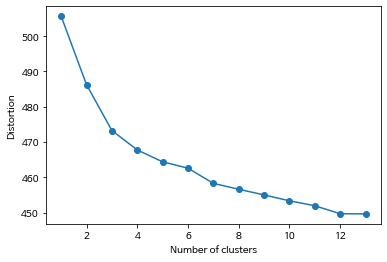

In [16]:
# K-means 클러스터링의 중심점이 움직이지 않을 때까지 fit 하여 최적의 클러스터 수 구하기

from sklearn.cluster import KMeans

distortions = []

for i in range(1, 14):

    km = KMeans(

        n_clusters=i, init='k-means++', n_init=10, max_iter=300,

        tol=1e-04, random_state=5

    )

    km.fit(tfidf_matrix)

    distortions.append(km.inertia_)

# elbow method를 이용해 최적의 클러스터 수 구하기
    
import matplotlib.pyplot as plt

plt.plot(range(1, 14), distortions, marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Distortion')

plt.show()






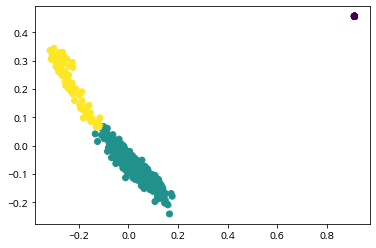

In [17]:
# 위에서 구한 결과인 9개의 클러스터로 클러스터링

km = KMeans(

    n_clusters=3, init='k-means++', n_init=10, max_iter=300,

    tol=1e-04, random_state=5

)

y_km = km.fit_predict(tfidf_matrix)

# 클러스터링 결과를 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km)

plt.show()



In [ ]:
# 위에서 구한 결과인 3개의 클러스터로 클러스터링

km = KMeans(

    n_clusters=3, init='k-means++', n_init=10, max_iter=300,

    tol=1e-04, random_state=42

)

y_km = km.fit_predict(tfidf_matrix)

# km.labels_ 구하기

km.labels_



array([1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1,

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


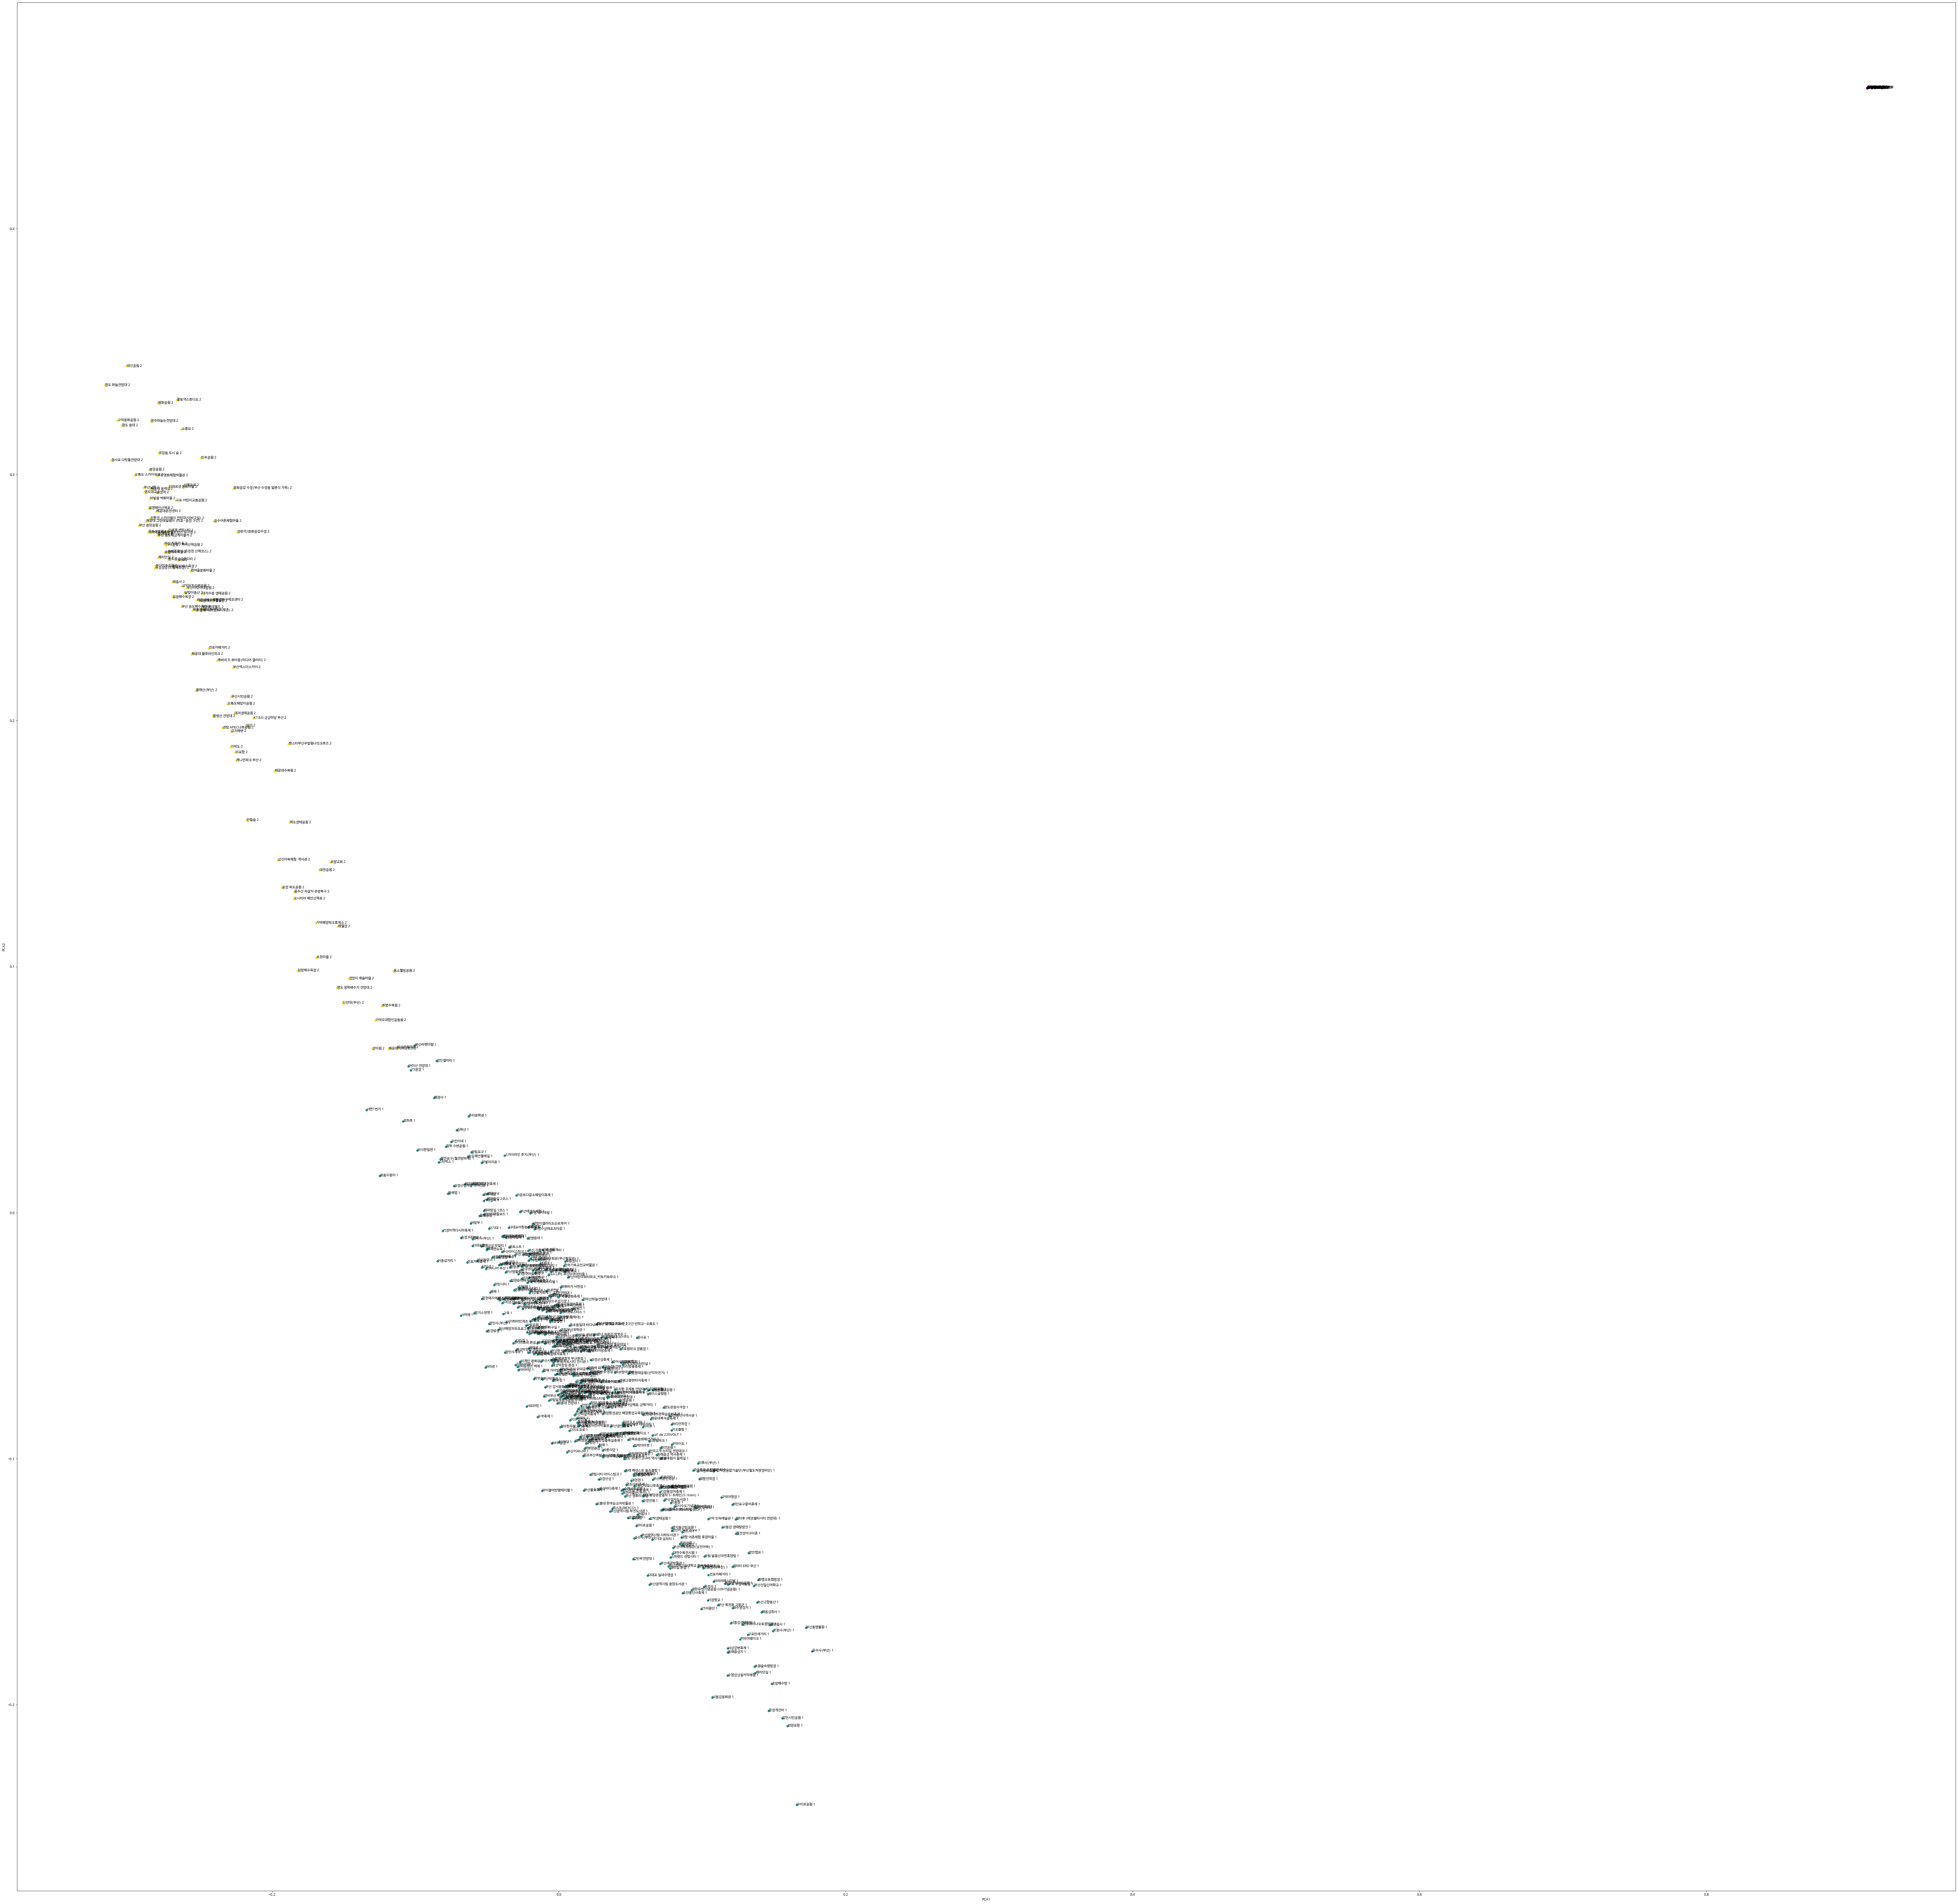

In [ ]:

# 시각화 하되 keyword의 이름을 표시하고 각 keyword의 이름과 km.labels_의 cluster 숫자를 점 옆에 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km)

for i in range(len(pca_data)):
    plt.text(pca_data[i, 0], pca_data[i, 1], df_mecab_adj['keyword'][i] + ' ' + str(km.labels_[i]))

# x축과 y축의 이름을 표시
    
plt.xlabel('PCA1')

plt.ylabel('PCA2')

plt.show()

In [ ]:

# 클러스터링 결과를 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km)

plt.show()


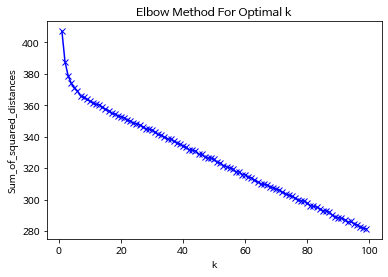

In [ ]:
# df_mecab_adj의 mecab_adj를 최적화한 클러스터수 구하기

from sklearn.cluster import KMeans

import numpy as np

Sum_of_squared_distances = []
K = range(1, 100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# df_mecab_adj의 mecab_adj 15개 클러스터링

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=20).fit(tfidf_matrix)

kmeans.labels_



array([13,  7,  5,  5,  1,  5, 13, 13, 13,  9, 13, 10,  5, 13,  9, 10,  7,
        2,  9,  9,  4,  9,  5, 14,  3, 13, 10,  6,  6,  6,  6,  6,  0, 17,
       13,  7, 15, 13, 13,  1,  9,  7,  9,  7,  8,  9,  7,  7, 13,  7,  7,
       13,  3,  8, 10,  1, 13,  6,  7,  6,  5,  5,  5,  7,  1, 11,  6, 13,
        3,  9, 11,  7,  2,  6, 10,  4,  7,  7, 14,  9, 10, 14,  1,  5,  1,
        4,  2, 14,  5,  5,  5,  2,  9,  6,  6,  6,  3,  9,  5,  9,  6,  9,
        5,  2,  9,  7,  9,  9,  2,  3,  6,  9,  7, 19, 17, 17,  5, 12,  7,
        6,  7, 13,  3,  9, 10,  7,  6, 11,  6,  3, 11, 12,  6, 13, 12,  6,
       13,  3,  6,  1,  6, 13, 16,  7,  9,  9, 10, 13, 11, 13,  6,  5, 13,
        7, 13,  6,  0, 19, 10, 12,  9,  3,  9,  6, 13,  6,  6,  6,  6, 13,
        3, 16,  6, 13, 12,  7, 13,  5, 10,  3, 13, 13, 13,  3, 10,  1,  9,
       17, 12,  5, 14,  4, 13,  9,  9, 11, 14,  5, 12, 13, 14, 13,  9, 16,
       13,  9,  9, 19, 14, 11, 14,  7, 13,  2, 15, 15,  7, 13, 14,  7,  9,
       11,  9, 16,  6,  9

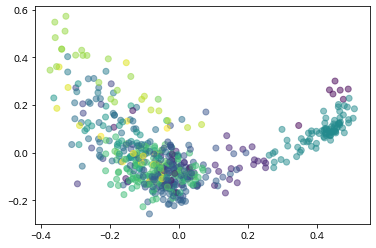

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

In [ ]:
# 클러스터링 결과를 df_mecab_adj에 추가

df_mecab_adj['cluster'] = kmeans.labels_
df_mecab_adj.head()

,Unnamed: 0,keyword,mecab_adj,cluster
0,0,168계단,"['손쉽', '좁', '힘드', '예쁘', '어렵', '멀', '갑작스럽', '가파...",17
1,1,25의용단,"['엄청나', '정겹', '헛되', '깊', '크', '어둡', '젊', '가깝',...",52
2,2,40계단 문화관,"['어지럽', '싸', '좁', '덩그러', '힘드', '예쁘', '어렵', '가볍...",29
3,3,40계단 문화관광테마거리,"['싸', '달갑', '잘', '좁', '덩그러', '속상하', '힘드', '예쁘'...",29
4,4,60년전통 할매국밥,"['엄청나', '싸', '좁', '힘드', '예쁘', '가볍', '멀', '뜨', ...",17


In [ ]:
# 클러스터의 키워드 분류

df_mecab_adj['cluster'].value_counts()

11    34
6     32
55    28
2     27
7     25
53    23
37    22
51    21
22    21
21    17
38    17
34    17
28    15
0     14
33    14
16    13
3     12
39    12
26    11
4     11
18    11
9     10
17    10
36     9
5      9
24     8
57     8
54     7
13     7
12     6
15     6
46     5
10     5
56     5
58     5
1      5
35     5
29     5
41     4
27     4
43     4
14     3
19     3
59     3
25     3
30     3
47     3
42     3
8      3
48     2
31     2
50     2
32     2
40     2
45     2
52     2
20     1
44     1
49     1
23     1
Name: cluster, dtype: int64

In [ ]:
# cluster가 2인 keyword 행의 수 출력

df_mecab_adj[df_mecab_adj['cluster'] == 2].shape

(190, 4)

In [ ]:
# cluster column을 기준으로 groupby

df_groupby_cluster = df_mecab_adj.groupby('cluster').count()
df_groupby_cluster

,Unnamed: 0,keyword,mecab_adj
cluster,,,
0,109,109,109
1,164,164,164
2,190,190,190
3,46,46,46
4,57,57,57


In [ ]:
# df_mecab_adj에서 cluster가 2인 keyword를 df_cluster_2에 저장

df_cluster_2 = df_mecab_adj[df_mecab_adj['cluster'] == 2]
df_cluster_2

,Unnamed: 0,keyword,mecab_adj,cluster
4,4,60년전통 할매국밥,맛있 없 싫 없 맛있 좋 맛있 아쉬우 무겁 없 맛있 재밌 맛있 없 아쉽 덥 맛있 있...,2
7,7,BIFF 광장,좋 같 많 같 맛나 있 같 힘들 갓 없 이쁘 이쁘 있 길 좋 같 이쁘 이쁘 있 예쁘...,2
13,13,café de 220VOLT,같 좋 좋 없 맛있 같 좋 있 좋 많 같 같 있 같 넓 좋 같 넓 많 같 있 좋 좋...,2
21,21,감지해변,좋 없 많 있 맛있 부드럽 맛있 희 없 있 많 맛있 좋 좋 맛있 싫 좋 많 맛있 사...,2
24,24,개금밀면,맛있 맛나 적 없 귀찮 맛있 있 재밌 저렇 얇 얇 겉 길 좋 세 있 있 머지않 맑 ...,2
...,...,...,...,...
526,526,헤이든,같 같 늦 알차 많 같 좋 낫 있 언짢 하얗 많 좋 좋 같 있 있 좋 아프 많 같 ...,2
542,542,히떼로스터리,짧 짧 짧 낮 작 지나치 같 같 많 맛있 맛있 있 있 옳 넓 좋 맛있 예쁘 맛없 싫...,2
545,545,﻿스시미르네 본점,맛있 좋 많 있 있 맛있 좋 좋 좋 있 있 괜찮,2
563,563,장산,같 편하 있 같 있 있 그렇 작 있 같 있 있 좋 같 있 같 싱겁 많 같 같 작 작...,2


In [ ]:
# df_cluster_2의 keyword를 리스트 형태로 출력

df_cluster_2['keyword'].tolist()

In [ ]:
# df_cluster_2 Unnamed: 0 컬럼 삭제한 뒤 csv로 저장

df_cluster_2 = df_cluster_2.drop(['Unnamed: 0'], axis=1)
df_cluster_2.to_csv('df_cluster_2.csv')

In [ ]:
# df_mecab_adj에서 cluster가 4인 keyword를 df_cluster_2에 저장

df_cluster_4 = df_mecab_adj[df_mecab_adj['cluster'] == 4]
df_cluster_4

,Unnamed: 0,keyword,mecab_adj,cluster
10,10,SEA LIFE 부산아쿠아리움,없 있 같 넓 같 같 좋 같 많 많 같 좋 좋 있 있 없 같 넓 같 크 크 나쁘 같...,4
20,20,감만시민공원,있 작 같 붉 검 크 작 있 있 많 있 있 있 있 뒤늦 좋 좋 편하 많 있 있 맛있...,4
36,36,광안리 SUP Zone,많 많 많 같 많 좋 많 새롭 쉽 쉽 재밌 편하 있 아름답 가깝 엄청나 없 예쁘 좋...,4
37,37,광안리어방축제,이쁘 같 좋 같 많 있 같 좋 같 다르 같 어떻 멋지 재밌 이쁘 같 좋 같 좋 많 ...,4
38,38,광안리패들보드,맛있 길 맛있 있 있 있 많 있 귀엽 있 야무지 있 좋 늦 나 없 재밌 좋 괜찮 어...,4
48,48,국립부산과학관,좋 좋 넓 많 크 있 귀엽 있 넓 재미있 좋 재밌 있 있 재밌 같 있 재미있 밝 짧...,4
51,51,국립해양박물관,좋 있 재밌 멋지 좋 넓 같 비싸 좋 좋 있 재밌 멋있 있 있 좋 많 있 있 있 없...,4
74,74,낙동강 생태탐방선,좋 늦 짧 짧 같 재밌 재밌 좋 많 쉽 없 재밌 같 좋 있 있 좋 재밌 좋 많 힘차...,4
75,75,낙동강구포나루축제,같 많 좋 같 같 같 있 많 넓 좋 좋 있 좋 좋 얇 심하 없 깊 많 넓 넓 맑 좋...,4
80,80,남도해양관광열차 S-트레인(S-train),있 재밌 같 걸 맞 걸 맞 없 많 많 같 다르 엄청나 좋 넓 있 있 있 없 같 없 ...,4


In [ ]:
# df_cluster_4의 keyword를 리스트 형태로 출력

df_cluster_4['keyword'].tolist()

['SEA LIFE 부산아쿠아리움',
 '감만시민공원',
 '광안리 SUP Zone',
 '광안리어방축제',
 '광안리패들보드',
 '국립부산과학관',
 '국립해양박물관',
 '낙동강 생태탐방선',
 '낙동강구포나루축제',
 '남도해양관광열차 S-트레인(S-train)',
 '동래읍성 역사축제',
 '법륜사(부산)',
 '복천박물관(부산)',
 '부산 트릭아이뮤지엄',
 '부산국제록페스티벌',
 '부산다이아몬드타워',
 '부산롯데월드',
 '부산박물관',
 '부산비엔날레',
 '부산세관박물관',
 '부산아쿠아리움',
 '부산어린이워터파크_키득키득파크',
 '부산어촌민속관',
 '부산원도심골목길축제',
 '부산원아시아페스티벌(BOF)',
 '부산자연곤충마을',
 '부산키자니아',
 '부산태권도체험',
 '부산해양자연사박물관',
 '부산해양치유프로그램(광안리)',
 '브릭캠퍼스 부산',
 '삼락수상레포츠타운',
 '소두방공원',
 '송정서핑학교',
 '수미르공원',
 '수산과학관(부산)',
 '수영강상설카약체험',
 '스카이라인 루지(부산)',
 '스포원파크',
 '아미르공원',
 '역사의 디오라마',
 '영도관광사격장',
 '영도다리축제',
 '임시수도기념관',
 '재난안전체험관',
 '정관생태하천학습문화축제',
 '조선통신사역사관',
 '조선통신사축제',
 '차성문화제',
 '초원숲속캠핑장',
 '키자니아 부산',
 '킴스아트필드미술관',
 '태종대스쿠버다이빙',
 '한국신발관',
 '해양스포츠교실',
 '현대모터스튜디오 부산',
 '화명수상레포츠타운']

# K - Medroids Clustering

In [ ]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 


In [ ]:
# 위 df_mecab_adj의 mecab_adj를 KMedoids로 클러스터링

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=5, random_state=0).fit(tfidf_matrix)

kmedoids.labels_


array([1, 4, 1, 1, 3, 1, 0, 3, 1, 2, 4, 4, 4, 3, 0, 4, 4, 4, 1, 4, 4, 2,
       4, 4, 3, 3, 4, 3, 3, 3, 0, 0, 1, 4, 1, 1, 4, 1, 1, 0, 0, 4, 1, 4,
       0, 1, 3, 1, 1, 4, 4, 4, 1, 4, 1, 2, 3, 3, 1, 3, 2, 1, 2, 4, 0, 3,
       3, 2, 3, 3, 1, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 2, 1, 0, 4,
       4, 4, 1, 3, 0, 3, 3, 3, 4, 1, 0, 0, 3, 2, 0, 0, 2, 4, 4, 4, 4, 0,
       3, 2, 4, 4, 4, 4, 1, 0, 4, 3, 4, 1, 2, 0, 4, 4, 3, 1, 4, 3, 1, 3,
       3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 4, 0, 3, 3, 2, 3, 2, 3, 1,
       4, 3, 1, 1, 0, 3, 0, 4, 2, 2, 0, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 4,
       2, 0, 2, 3, 1, 1, 0, 0, 4, 3, 4, 1, 1, 1, 1, 4, 3, 1, 0, 4, 1, 2,
       2, 2, 1, 3, 1, 1, 3, 1, 1, 4, 0, 1, 0, 4, 4, 0, 4, 4, 4, 1, 1, 1,
       1, 1, 0, 3, 0, 1, 3, 4, 1, 1, 4, 1, 1, 1, 0, 2, 1, 1, 4, 3, 4, 1,
       1, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 4, 4, 1, 2, 0, 4, 0, 4, 4, 4, 4,
       1, 3, 1, 4, 3, 2, 1, 3, 2, 4, 1, 4, 4, 4, 4, 1, 4, 0, 2, 3, 3, 1,
       1, 1, 4, 4, 1, 1, 1, 4, 2, 3, 3, 4, 1, 4, 2,

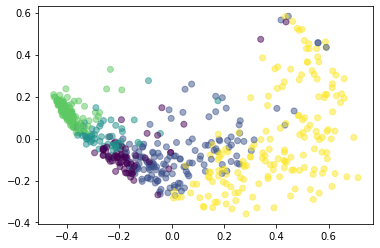

In [ ]:

# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

plt.show()

In [ ]:
# 클러스터링 결과를 df_mecab_adj에 추가

df_mecab_adj['cluster_M'] = kmedoids.labels_
df_mecab_adj.head()

,Unnamed: 0,keyword,mecab_adj,cluster_M
0,0,168계단,있 없 있 없 비싸 멀 있 많 있 있 있 있 많 많 무섭 힘들 좋 있 많 다르 귀엽...,1
1,1,25의용단,좋 없 없 없 없 같 있 있 어렵 있 좋 같 있 좋 크 굵 노랗 좋 많 없 귀하 많...,4
2,2,40계단 문화관,늦 좋 좋 없 같 비싸 좋 크 크 있 없 없 있 이쁘 좋 있 없 나쁘 없 좋 어이없...,1
3,3,40계단 문화관광테마거리,수많 있 없 없 없 있 깊 있 있 좋 멋지 있 없 있 있 있 많 많 수많 같 없 같...,1
4,4,60년전통 할매국밥,맛있 없 싫 없 맛있 좋 맛있 아쉬우 무겁 없 맛있 재밌 맛있 없 아쉽 덥 맛있 있...,3


In [ ]:
# keyword, cluster, cluster_M를 df_mecab_adj_cluster_result에 저장

df_mecab_adj_cluster_result = df_mecab_adj[['keyword', 'cluster', 'cluster_M']]

# df_mecab_adj_cluster_result를 csv로 저장

df_mecab_adj_cluster_result.to_csv('df_mecab_adj_cluster_result.csv')

In [ ]:
# df_mecab_adj_cluster_result를 excel에서 열 수 있게 저장

df_mecab_adj_cluster_result.to_excel('df_mecab_adj_cluster_result.xlsx')

In [ ]:
# keyword 중 cluster와 cluster_M 이 다른 것을 출력

df_mecab_adj_cluster_result[df_mecab_adj_cluster_result['cluster'] != df_mecab_adj_cluster_result['cluster_M']]

,keyword,cluster,cluster_M
1,25의용단,0,4
4,60년전통 할매국밥,4,3
6,AREA6,1,0
7,BIFF 광장,4,3
9,KT&G 상상마당 부산,1,2
...,...,...,...
559,백양산,2,4
560,송도반도,1,0
562,이기대,1,0
563,장산,4,3


In [ ]:
# cluster_M column을 기준으로 groupby

df_groupby_cluster_M = df_mecab_adj.groupby('cluster_M').count()
df_groupby_cluster_M

,Unnamed: 0,keyword,mecab_adj,cluster
cluster_M,,,,
0,72,72,72,72
1,143,143,143,143
2,55,55,55,55
3,125,125,125,125
4,171,171,171,171


In [ ]:
# cluster 4인 keyword 출력

df_mecab_adj_cluster_result[df_mecab_adj_cluster_result['cluster_M'] == 4]

,keyword,cluster,cluster_M
1,25의용단,0,4
10,SEA LIFE 부산아쿠아리움,3,4
11,UN평화축제,2,4
12,[부산 갈맷길 2코스] 2구간 민락교~오륙도,2,4
15,가덕도 등대,2,4
...,...,...,...
552,감천항,2,4
554,낙동강하구,2,4
556,두도,2,4
557,두송반도,0,4


In [ ]:
# cluster 2인 keyword를 리스트 형태로 출력

df_mecab_adj_cluster_result[df_mecab_adj_cluster_result['cluster_M'] == 2]['keyword'].tolist()

['KT&G 상상마당 부산',
 '감지해변',
 '금강식물원',
 '금정산성 막걸리',
 '금정산성축제',
 '기장붕장어축제',
 '내원정사(부산)',
 '당산',
 '대신공원',
 '대천공원',
 '동래온천(허심청)',
 '라라라페스티벌',
 '만들숲',
 '모루식당',
 '모모스로스터리&커피바',
 '미포항',
 '민락수변공원',
 '범어사 템플스테이',
 '법륜사(부산)',
 '부산 암남공원',
 '부산 에덴공원',
 '부산 영화의 전당',
 '부산아이스링크',
 '부산자갈치축제',
 '부산자유회관(부산통일관)',
 '부산푸드필름페스타',
 '비비비당',
 '사상강변축제',
 '삼진어묵체험·역사관',
 '소름요',
 '송상현광장',
 '송정집',
 '신세계 센텀시티',
 '에테르',
 '영도마리나오토캠핑장',
 '영도커피페스티벌',
 '이동항',
 '이중섭거리',
 '일광해수욕장',
 '장안사계곡',
 '전포커피축제',
 '정인갤러리',
 '지오클럽',
 '차이나타운특구 문화축제',
 '초량교회',
 '카운트다운&해맞이축제',
 '커피어웨이크',
 '코하루',
 '태종대온천찜질방',
 '피아크',
 '해리단길',
 '해운대달맞이온천축제',
 '해운대북극곰축제',
 '해운대온천센터',
 '헤이든']

# 전체 시각화 및 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


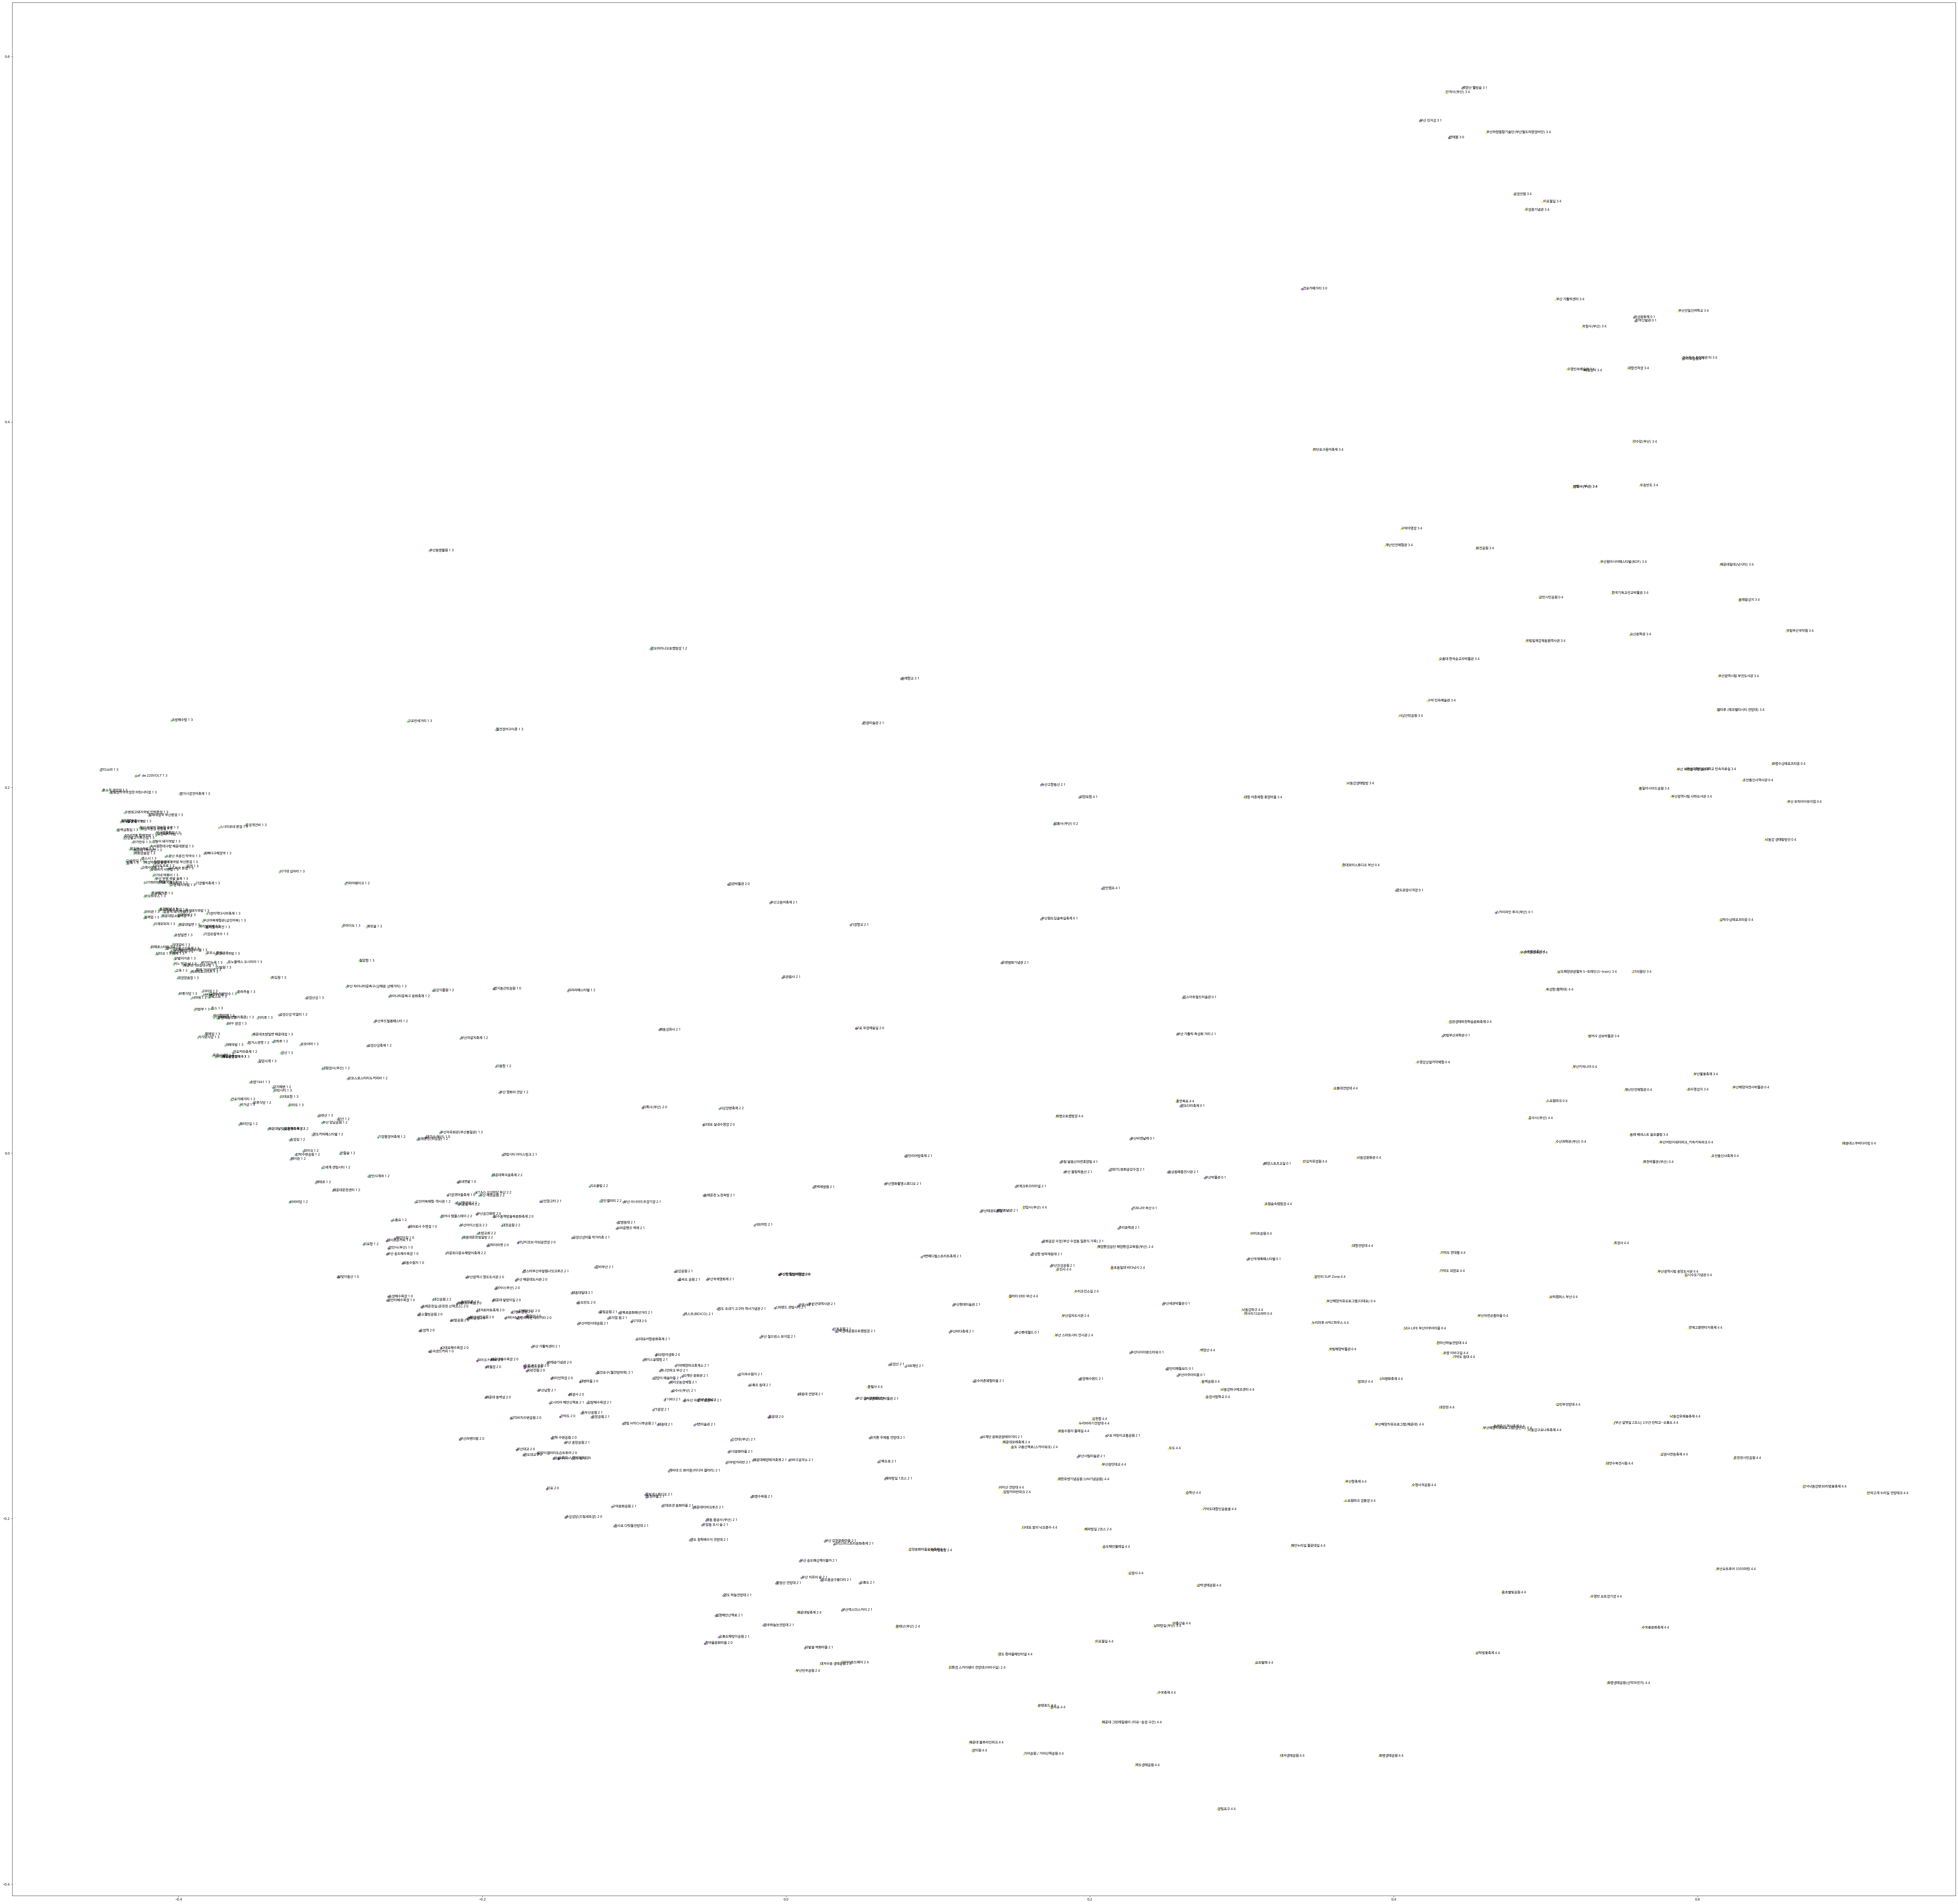

In [ ]:
# 시각화 하되 keyword의 이름을 표시하고 각 keyword의 kmeans.labels_ 와 kmedoids.labels_의 cluster 숫자를 점 옆에 표시
# 점 크기와 글씨 크기 작게 설정

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], df_mecab_adj['keyword'][i] + ' ' + str(kmeans.labels_[i]) + ' ' + str(kmedoids.labels_[i]))




plt.show()


In [ ]:
plt.savefig('cluster.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# tfidf_matrix를 keyword와 함께 df_mecab_adj_matrix에 저장
vectorizer = TfidfVectorizer()

df_mecab_adj_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())
df_mecab_adj_matrix['keyword'] = df_mecab_adj['keyword']
df_mecab_adj_matrix.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NotFittedError: ignored

In [ ]:

# df_mecab_adj_matrix를 csv로 저장
df_mecab_adj_matrix.to_csv('df_mecab_adj_matrix.csv')